<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week1/50%20Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Andi Cleopatra Maryam Jamila
#####1103213071
#####50 Startup Simple Linear Regression, Multiple Linear Regression, dan Polynomial Regression

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

* pandas: Digunakan untuk memanipulasi dan menganalisis data dalam bentuk tabel (DataFrame).
* numpy: Digunakan untuk operasi array dan perhitungan numerik.
* matplotlib.pyplot: Digunakan untuk membuat visualisasi grafis.
* train_test_split: Membagi dataset menjadi set pelatihan dan pengujian.
* LinearRegression: Untuk membuat model regresi linier.
* PolynomialFeatures: Untuk membuat fitur polinomial dari data asli (digunakan dalam regresi polinomial).
* mean_squared_error, r2_score: Digunakan untuk mengukur performa model (evaluasi model).

In [ ]:
# Membaca dataset 50_Startups.csv
dataset = pd.read_csv('/content/sample_data/50_Startups.csv')


* Dataset ini berisi data pengeluaran (misalnya R&D, Administrasi, Pemasaran) dan laba perusahaan. pd.read_csv() digunakan untuk membaca file CSV dan memuatnya ke dalam DataFrame.

In [ ]:
# Menampilkan 5 baris pertama dari dataset
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


* dataset.head() menampilkan lima baris pertama dari dataset untuk melihat data awal dan memahami struktur kolom.

In [ ]:
# 1. Simple Linear Regression
X = dataset[['R&D Spend']].values  # Fitur independen
y = dataset['Profit'].values       # Target (Profit)

* X adalah fitur yang akan digunakan untuk memprediksi profit, dalam hal ini, pengeluaran R&D.
* y adalah target yang ingin diprediksi, yaitu profit perusahaan.

In [ ]:
# Membagi dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Dataset dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split().
* random_state=42 memastikan bahwa hasil pembagian dataset selalu sama (untuk reproduktifitas).
* X_train dan y_train digunakan untuk melatih model, sedangkan X_test dan y_test digunakan untuk menguji model.

In [ ]:
# Membuat model Simple Linear Regression
simple_lin_reg = LinearRegression()
simple_lin_reg.fit(X_train, y_train)

LinearRegression()

* LinearRegression() digunakan untuk membuat model regresi linier sederhana.
* fit(X_train, y_train) melatih model dengan data pelatihan. Model ini belajar hubungan linier antara pengeluaran R&D dan profit.

In [ ]:
# Melakukan prediksi pada data uji
y_pred_simple = simple_lin_reg.predict(X_test)

* Setelah model dilatih, predict(X_test) digunakan untuk memprediksi profit pada data uji berdasarkan pengeluaran R&D di X_test.

In [ ]:
# Evaluasi model Simple Linear Regression
print("Simple Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_simple))
print("R^2 Score:", r2_score(y_test, y_pred_simple))

Simple Linear Regression:
Mean Squared Error (MSE): 59510962.80787997
R^2 Score: 0.9265108109341951


* Mean Squared Error (MSE) mengukur rata-rata kesalahan kuadrat antara nilai aktual (profit sebenarnya) dan nilai prediksi. Semakin kecil nilai MSE, semakin baik model.
* R² Score mengukur seberapa baik model bisa menjelaskan variabilitas profit berdasarkan pengeluaran R&D. Nilai R² mendekati 1 berarti model sangat baik.

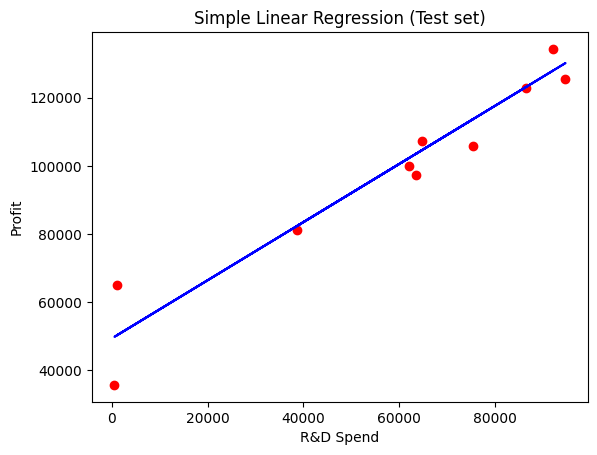

In [ ]:
# Visualisasi hasil Simple Linear Regression
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_simple, color='blue')
plt.title('Simple Linear Regression (Test set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

* Scatter plot menampilkan data aktual (pengeluaran R&D dan profit) dengan titik merah.
* Garis biru menunjukkan hasil prediksi dari model regresi linier, yang menunjukkan hubungan linier antara pengeluaran R&D dan profit.
* Visualisasi ini membantu melihat bagaimana prediksi model dibandingkan dengan data aktual.

In [ ]:
# 2. Multiple Linear Regression
# Multiple Linear Regression menggunakan semua fitur independen: 'R&D Spend', 'Administration', 'Marketing Spend'
X_multiple = dataset[['R&D Spend', 'Administration', 'Marketing Spend']].values

* Pada model Multiple Linear Regression, kita menggunakan lebih dari satu fitur (variabel independen). Di sini, kita menggunakan pengeluaran R&D, administrasi, dan pemasaran sebagai variabel independen untuk memprediksi profit.

In [ ]:
# Membagi dataset menjadi training dan testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

* Dataset dibagi menjadi set pelatihan dan pengujian, di mana 80% data digunakan untuk melatih model, dan 20% untuk pengujian. Pembagian ini dilakukan secara acak dengan random_state=42 agar hasil yang sama dapat direproduksi.

In [ ]:
# Membuat model Multiple Linear Regression
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(X_train_multiple, y_train_multiple)

LinearRegression()

* LinearRegression() digunakan untuk membuat model regresi linier.
* Model ini dilatih menggunakan fitur-fitur independen seperti R&D Spend, Administration, dan Marketing Spend.

In [ ]:
# Melakukan prediksi pada data uji
y_pred_multiple = multiple_lin_reg.predict(X_test_multiple)


* Setelah model dilatih, prediksi dibuat untuk data uji menggunakan predict(). Prediksi ini memberikan perkiraan profit berdasarkan pengeluaran di tiga fitur tersebut.

In [ ]:
# Evaluasi model Multiple Linear Regression
print("\nMultiple Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_multiple, y_pred_multiple))
print("R^2 Score:", r2_score(y_test_multiple, y_pred_multiple))


Multiple Linear Regression:
Mean Squared Error (MSE): 80926321.22295158
R^2 Score: 0.9000653083037321


* MSE (Mean Squared Error) mengukur seberapa jauh nilai prediksi dari nilai aktual. Semakin kecil MSE, semakin baik model dalam memprediksi.
* R² Score mengukur seberapa baik fitur-fitur yang digunakan bisa menjelaskan variabilitas dalam target (Profit). Semakin mendekati 1, semakin baik.

In [ ]:
# 3. Polynomial Regression
# Menggunakan Polynomial Regression dengan fitur 'R&D Spend'
poly_reg = PolynomialFeatures(degree=4)  # Menggunakan derajat 4 sebagai contoh
X_poly = poly_reg.fit_transform(X)

* Dalam Polynomial Regression, fitur R&D Spend ditransformasikan menjadi derajat polinomial ke-4. Ini berarti kita memperkenalkan hubungan non-linier antara variabel independen dan target.
* PolynomialFeatures(degree=4) menambah kompleksitas model dengan memasukkan fitur-fitur polinomial.

In [ ]:
# Membagi dataset menjadi training dan testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

* Dataset yang telah ditransformasikan ke dalam bentuk polinomial dibagi menjadi training dan testing set dengan rasio yang sama seperti sebelumnya.

In [ ]:
# Membuat model Linear Regression untuk Polynomial Regression
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

* LinearRegression() digunakan untuk melatih model dengan fitur polinomial yang telah dibuat.

In [ ]:
# Melakukan prediksi pada data uji
y_pred_poly = lin_reg_poly.predict(X_test_poly)

* Prediksi dilakukan dengan fitur polinomial yang ada di set uji.

In [ ]:
# Evaluasi model Polynomial Regression
print("\nPolynomial Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_poly, y_pred_poly))
print("R^2 Score:", r2_score(y_test_poly, y_pred_poly))


Polynomial Regression:
Mean Squared Error (MSE): 74465492.57208416
R^2 Score: 0.9080436880146799


* MSE dan R² Score digunakan untuk mengevaluasi performa model Polynomial Regression.
* MSE yang lebih rendah dan R² Score yang mendekati 1 menunjukkan bahwa model polinomial lebih baik dalam menangkap hubungan non-linier.

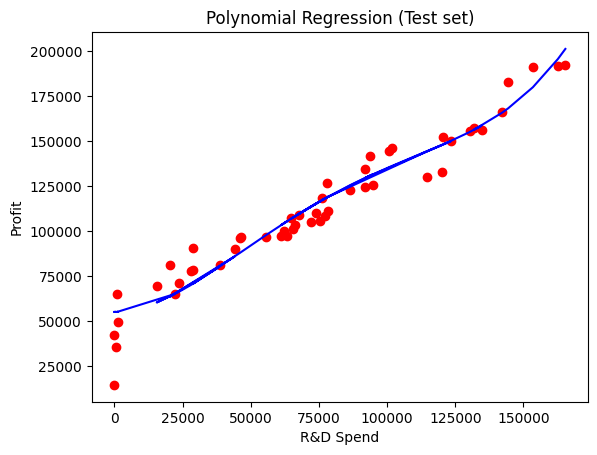

In [ ]:
# Visualisasi hasil Polynomial Regression
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_poly.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression (Test set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

* Grafik ini menunjukkan hubungan antara R&D Spend dan Profit, di mana titik merah menunjukkan data aktual, dan garis biru menunjukkan prediksi dari model Polynomial Regression. Garis polinomial memberikan gambaran yang lebih fleksibel tentang hubungan data yang non-linier.